In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Calculate IQ Magnitude

In [3]:
def calculate_IQMagnitude(complex_data):
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    
    return magnitude

### Calculate IQ Angle

In [4]:
def calculate_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)
    return angle
    

### Calculate RSSI

In [18]:
def calculate_rssi(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    rssi = 10 * np.log10(I**2 + Q**2)
    
    return rssi

### Trunacate Vectors

In [4]:
def truncate_vectors_to_same_size(*vectors):
    # Find the minimum length among all vectors
    min_length = min(len(vec) for vec in vectors)
    # Truncate all vectors to the same length
    return [vec[:min_length] for vec in vectors]

### Sanitize Vectors

In [5]:
def sanitize_vector(vector):
    # Replace NaN or Inf values with zeros or a suitable value
    vector = np.nan_to_num(vector, nan=0.0, posinf=0.0, neginf=0.0)
    return vector

### Reading Data

In [6]:
dataWithOutInterference = getData("./nothing1.cfile")

In [7]:
dataWithOutInterference2 = getData("./nothing2.cfile")

In [8]:
dataWithInterferenceLOSCenter = getData("./centersecond1.cfile")
dataWithInterferenceLOSFirstQuartile = getData("./centerfirst1.cfile")
dataWithInterferenceLOSThirdQuartile = getData("./centerthird1.cfile")

In [9]:
dataWithInterferenceLOSCenter2 = getData("./centersecond2.cfile")
dataWithInterferenceLOSFirstQuartile2 = getData("./centerfirst2.cfile")
dataWithInterferenceLOSThirdQuartile2 = getData("./centerthird2.cfile")

In [ ]:
dataWithInterferenceLOSCenter3 = getData("./centersecond3.cfile")
dataWithInterferenceLOSFirstQuartile3 = getData("./centerfirst3.cfile")
dataWithInterferenceLOSThirdQuartile3 = getData("./centerthird3.cfile")

In [10]:
dataWithInterferenceLOSCenter4 = getData("./centersecond4.cfile")
dataWithInterferenceLOSFirstQuartile4 = getData("./centerfirst4.cfile")
dataWithInterferenceLOSThirdQuartile4 = getData("./centerthird4.cfile")

In [11]:
dataWithInterferenceNLOSLeftCenter = getData("./leftsecond1.cfile")
dataWithInterferenceNLOSLeftFirstQuartile = getData("./leftfirst1.cfile")
dataWithInterferenceNLOSLeftThirdQuartile = getData("./leftthird1.cfile")

In [12]:
dataWithInterferenceNLOSLeftCenter2 = getData("./leftsecond2.cfile")
dataWithInterferenceNLOSLeftFirstQuartile2 = getData("./leftfirst2.cfile")
dataWithInterferenceNLOSLeftThirdQuartile2 = getData("./leftthird2.cfile")

In [ ]:
dataWithInterferenceNLOSLeftCenter3 = getData("./leftsecond3.cfile")
dataWithInterferenceNLOSLeftFirstQuartile3 = getData("./leftfirst3.cfile")
dataWithInterferenceNLOSLeftThirdQuartile3 = getData("./leftthird3.cfile")

In [13]:
dataWithInterferenceNLOSLeftCenter4 = getData("./leftsecond4.cfile")
dataWithInterferenceNLOSLeftFirstQuartile4 = getData("./leftfirst4.cfile")
dataWithInterferenceNLOSLeftThirdQuartile4 = getData("./leftthird4.cfile")

In [14]:
dataWithInterferenceNLOSRightCenter = getData("./rightsecond1.cfile")
dataWithInterferenceNLOSRightFirstQuartile = getData("./rightfirst1.cfile")
dataWithInterferenceNLOSRightThirdQuartile = getData("./rightthird1.cfile")

In [15]:
dataWithInterferenceNLOSRightCenter2 = getData("./rightsecond2.cfile")
dataWithInterferenceNLOSRightFirstQuartile2 = getData("./rightfirst2.cfile")
dataWithInterferenceNLOSRightThirdQuartile2 = getData("./rightthird2.cfile")

In [ ]:
dataWithInterferenceNLOSRightCenter3 = getData("./rightsecond3.cfile")
dataWithInterferenceNLOSRightFirstQuartile3 = getData("./rightfirst3.cfile")
dataWithInterferenceNLOSRightThirdQuartile3 = getData("./rightthird3.cfile")

In [16]:
dataWithInterferenceNLOSRightCenter4 = getData("./rightsecond4.cfile")
dataWithInterferenceNLOSRightFirstQuartile4 = getData("./rightfirst4.cfile")
dataWithInterferenceNLOSRightThirdQuartile4 = getData("./rightthird4.cfile")

### Remove No Obstruction

### RSSI

In [19]:
RSSI_Vectors_Raw1 = [
    sanitize_vector(calculate_rssi(dataWithOutInterference)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftFirstQuartile)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftCenter)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftThirdQuartile)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSFirstQuartile)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSCenter)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSThirdQuartile)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightFirstQuartile)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightCenter)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightThirdQuartile)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_8388\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)


In [20]:
RSSI_Vectors_Raw2 = [
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSFirstQuartile2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSCenter2)),

    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftFirstQuartile2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftCenter2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftThirdQuartile2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSThirdQuartile2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightFirstQuartile2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightCenter2)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightThirdQuartile2)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_8388\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)


In [ ]:
RSSI_Vectors_Raw3 = [
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftFirstQuartile3)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftCenter3)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftThirdQuartile3)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSFirstQuartile3)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSCenter3)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSThirdQuartile3)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightFirstQuartile3)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightCenter3)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightThirdQuartile3)),
]

In [21]:
RSSI_Vectors_Raw4 = [
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftFirstQuartile4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftCenter4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSLeftThirdQuartile4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSFirstQuartile4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSCenter4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceLOSThirdQuartile4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightFirstQuartile4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightCenter4)),
    sanitize_vector(calculate_rssi(dataWithInterferenceNLOSRightThirdQuartile4)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_8388\277351076.py:10: RuntimeWarning: divide by zero encountered in log10
  rssi = 10 * np.log10(I**2 + Q**2)


In [ ]:
RSSI_Vectors_Raw = (RSSI_Vectors_Raw1 + RSSI_Vectors_Raw2 + RSSI_Vectors_Raw3 + RSSI_Vectors_Raw4)
# Phase_Vectors_Raw = (Phase_Vectors_Raw1 + Phase_Vectors_Raw2)

In [ ]:
RSSI_Vectors = truncate_vectors_to_same_size(*RSSI_Vectors_Raw)

# Map back truncated vectors to their variables
(
    RSSI_WithOutInterference,
    
    RSSI_NLOSLeftFirstQuartile,
    RSSI_NLOSLeftCenter,
    RSSI_NLOSLeftThirdQuartile,
    RSSI_LOSFirstQuartile,
    RSSI_LOSCenter,
    RSSI_LOSThirdQuartile,
    RSSI_NLOSRightFirstQuartile,
    RSSI_NLOSRightCenter,
    RSSI_NLOSRightThirdQuartile,

    RSSI_LOSFirstQuartile2,
    RSSI_LOSCenter2,

    RSSI_NLOSLeftFirstQuartile2,
    RSSI_NLOSLeftCenter2,
    RSSI_NLOSLeftThirdQuartile2,
    
    RSSI_LOSThirdQuartile2,
    RSSI_NLOSRightFirstQuartile2,
    RSSI_NLOSRightCenter2,
    RSSI_NLOSRightThirdQuartile2,

    RSSI_NLOSLeftFirstQuartile3,
    RSSI_NLOSLeftCenter3,
    RSSI_NLOSLeftThirdQuartile3,
    RSSI_LOSFirstQuartile3,
    RSSI_LOSCenter3,
    RSSI_LOSThirdQuartile3,
    RSSI_NLOSRightFirstQuartile3,
    RSSI_NLOSRightCenter3,
    RSSI_NLOSRightThirdQuartile3,

    RSSI_NLOSLeftFirstQuartile4,
    RSSI_NLOSLeftCenter4,
    RSSI_NLOSLeftThirdQuartile4,
    RSSI_LOSFirstQuartile4,
    RSSI_LOSCenter4,
    RSSI_LOSThirdQuartile4,
    RSSI_NLOSRightFirstQuartile4,
    RSSI_NLOSRightCenter4,
    RSSI_NLOSRightThirdQuartile4,
) = RSSI_Vectors

NameError: name 'truncate_vectors_to_same_size' is not defined

In [ ]:
RSSI_NLOSLeftFirstQuartile_Cleaned = RSSI_NLOSLeftFirstQuartile - RSSI_WithOutInterference
RSSI_NLOSLeftCenter_Cleaned = RSSI_NLOSLeftCenter - RSSI_WithOutInterference
RSSI_NLOSLeftThirdQuartile_Cleaned =  RSSI_NLOSLeftThirdQuartile - RSSI_WithOutInterference
RSSI_LOSFirstQuartile_Cleaned = RSSI_LOSFirstQuartile - RSSI_WithOutInterference
RSSI_LOSCenter_Cleaned = RSSI_LOSCenter - RSSI_WithOutInterference
RSSI_LOSThirdQuartile_Cleaned = RSSI_LOSThirdQuartile - RSSI_WithOutInterference
RSSI_NLOSRightFirstQuartile_Cleaned = RSSI_NLOSRightFirstQuartile - RSSI_WithOutInterference
RSSI_NLOSRightCenter_Cleaned = RSSI_NLOSRightCenter - RSSI_WithOutInterference
RSSI_NLOSRightThirdQuartile_Cleaned = RSSI_NLOSRightThirdQuartile - RSSI_WithOutInterference

RSSI_LOSFirstQuartile2_Cleaned = RSSI_LOSFirstQuartile2 - RSSI_WithOutInterference
RSSI_LOSCenter2_Cleaned = RSSI_LOSCenter2 - RSSI_WithOutInterference

RSSI_NLOSLeftFirstQuartile2_Cleaned = RSSI_NLOSLeftFirstQuartile2 - RSSI_WithOutInterference
RSSI_NLOSLeftCenter2_Cleaned = RSSI_NLOSLeftCenter2 - RSSI_WithOutInterference
RSSI_NLOSLeftThirdQuartile2_Cleaned =  RSSI_NLOSLeftThirdQuartile2 - RSSI_WithOutInterference
RSSI_LOSThirdQuartile2_Cleaned = RSSI_LOSThirdQuartile2 - RSSI_WithOutInterference
RSSI_NLOSRightFirstQuartile2_Cleaned = RSSI_NLOSRightFirstQuartile2 - RSSI_WithOutInterference
RSSI_NLOSRightCenter2_Cleaned = RSSI_NLOSRightCenter2 - RSSI_WithOutInterference
RSSI_NLOSRightThirdQuartile2_Cleaned = RSSI_NLOSRightThirdQuartile2 - RSSI_WithOutInterference

RSSI_NLOSLeftFirstQuartile3_Cleaned = RSSI_NLOSLeftFirstQuartile3 - RSSI_WithOutInterference
RSSI_NLOSLeftCenter3_Cleaned = RSSI_NLOSLeftCenter3 - RSSI_WithOutInterference
RSSI_NLOSLeftThirdQuartile3_Cleaned =  RSSI_NLOSLeftThirdQuartile3 - RSSI_WithOutInterference
RSSI_LOSFirstQuartile3_Cleaned = RSSI_LOSFirstQuartile3 - RSSI_WithOutInterference
RSSI_LOSCenter3_Cleaned = RSSI_LOSCenter3 - RSSI_WithOutInterference
RSSI_LOSThirdQuartile3_Cleaned = RSSI_LOSThirdQuartile3 - RSSI_WithOutInterference
RSSI_NLOSRightFirstQuartile3_Cleaned = RSSI_NLOSRightFirstQuartile3 - RSSI_WithOutInterference
RSSI_NLOSRightCenter3_Cleaned = RSSI_NLOSRightCenter3 - RSSI_WithOutInterference
RSSI_NLOSRightThirdQuartile3_Cleaned = RSSI_NLOSRightThirdQuartile3 - RSSI_WithOutInterference

RSSI_NLOSLeftFirstQuartile4_Cleaned = RSSI_NLOSLeftFirstQuartile4 - RSSI_WithOutInterference
RSSI_NLOSLeftCenter4_Cleaned = RSSI_NLOSLeftCenter4 - RSSI_WithOutInterference
RSSI_NLOSLeftThirdQuartile4_Cleaned =  RSSI_NLOSLeftThirdQuartile4 - RSSI_WithOutInterference
RSSI_LOSFirstQuartile4_Cleaned = RSSI_LOSFirstQuartile4 - RSSI_WithOutInterference
RSSI_LOSCenter4_Cleaned = RSSI_LOSCenter4 - RSSI_WithOutInterference
RSSI_LOSThirdQuartile4_Cleaned = RSSI_LOSThirdQuartile4 - RSSI_WithOutInterference
RSSI_NLOSRightFirstQuartile4_Cleaned = RSSI_NLOSRightFirstQuartile4 - RSSI_WithOutInterference
RSSI_NLOSRightCenter4_Cleaned = RSSI_NLOSRightCenter4 - RSSI_WithOutInterference
RSSI_NLOSRightThirdQuartile4_Cleaned = RSSI_NLOSRightThirdQuartile4 - RSSI_WithOutInterference

#### RSSI Vector Clean Mean Array Calculation 1, 2, 3

In [ ]:
RSSI_LOSCenter_Array = np.array([RSSI_LOSCenter_Cleaned, RSSI_LOSCenter2_Cleaned, RSSI_LOSCenter3_Cleaned])
RSSI_LOSCenter_Mean_Array14 = np.mean(RSSI_LOSCenter_Array, axis=0)
RSSI_LOSFirstQuartile_Array = np.array([RSSI_LOSFirstQuartile_Cleaned, RSSI_LOSFirstQuartile2_Cleaned, RSSI_LOSFirstQuartile3_Cleaned])
RSSI_LOSFirstQuartile_Mean_Array14 = np.mean(RSSI_LOSFirstQuartile_Array, axis=0)
RSSI_LOSThirdQuartile_Array = np.array([RSSI_LOSThirdQuartile_Cleaned, RSSI_LOSThirdQuartile2_Cleaned, RSSI_LOSThirdQuartile3_Cleaned])
RSSI_LOSThirdQuartile_Mean_Array14 = np.mean(RSSI_LOSThirdQuartile_Array, axis=0)

In [ ]:
RSSI_NLOSLeftCenter_Array = np.array([RSSI_NLOSLeftCenter_Cleaned, RSSI_NLOSLeftCenter2_Cleaned, RSSI_NLOSLeftCenter3_Cleaned])
RSSI_NLOSLeftCenter_Mean_Array14 = np.mean(RSSI_NLOSLeftCenter_Array, axis=0)
RSSI_NLOSLeftFirstQuartile_Array = np.array([RSSI_NLOSLeftFirstQuartile_Cleaned, RSSI_NLOSLeftFirstQuartile2_Cleaned, RSSI_NLOSLeftFirstQuartile3_Cleaned])
RSSI_NLOSLeftFirstQuartile_Mean_Array14 = np.mean(RSSI_NLOSLeftFirstQuartile_Array, axis=0)
RSSI_NLOSLeftThirdQuartile_Array = np.array([RSSI_NLOSLeftThirdQuartile_Cleaned, RSSI_NLOSLeftThirdQuartile2_Cleaned, RSSI_NLOSLeftThirdQuartile3_Cleaned])
RSSI_NLOSLeftThirdQuartile_Mean_Array14 = np.mean(RSSI_NLOSLeftThirdQuartile_Array, axis=0)

In [ ]:
RSSI_NLOSRightCenter_Array = np.array([RSSI_NLOSRightCenter_Cleaned, RSSI_NLOSRightCenter2_Cleaned, RSSI_NLOSRightCenter3_Cleaned])
RSSI_NLOSRightCenter_Mean_Array14 = np.mean(RSSI_NLOSRightCenter_Array, axis=0)
RSSI_NLOSRightFirstQuartile_Array = np.array([RSSI_NLOSRightFirstQuartile_Cleaned, RSSI_NLOSRightFirstQuartile2_Cleaned, RSSI_NLOSRightFirstQuartile3_Cleaned])
RSSI_NLOSRightFirstQuartile_Mean_Array14 = np.mean(RSSI_NLOSRightFirstQuartile_Array, axis=0)
RSSI_NLOSRightThirdQuartile_Array = np.array([RSSI_NLOSRightThirdQuartile_Cleaned, RSSI_NLOSRightThirdQuartile2_Cleaned, RSSI_NLOSRightThirdQuartile3_Cleaned])
RSSI_NLOSRightThirdQuartile_Mean_Array14 = np.mean(RSSI_NLOSRightThirdQuartile_Array, axis=0)

#### RSSI Vector Clean Mean Array Calculation 1, 2, 3(4)

In [ ]:
RSSI_LOSCenter_Array14 = np.array([RSSI_LOSCenter_Cleaned, RSSI_LOSCenter4_Cleaned])
RSSI_LOSCenter_Mean_Array14 = np.mean(RSSI_LOSCenter_Array14, axis=0)
RSSI_LOSFirstQuartile_Array14 = np.array([RSSI_LOSFirstQuartile_Cleaned, RSSI_LOSFirstQuartile4_Cleaned])
RSSI_LOSFirstQuartile_Mean_Array14 = np.mean(RSSI_LOSFirstQuartile_Array14, axis=0)
RSSI_LOSThirdQuartile_Array14 = np.array([RSSI_LOSThirdQuartile_Cleaned, RSSI_LOSThirdQuartile4_Cleaned])
RSSI_LOSThirdQuartile_Mean_Array14 = np.mean(RSSI_LOSThirdQuartile_Array14, axis=0)

In [26]:
RSSI_NLOSLeftCenter_Array14 = np.array([RSSI_NLOSLeftCenter_Cleaned, RSSI_NLOSLeftCenter4_Cleaned])
RSSI_NLOSLeftCenter_Mean_Array14 = np.mean(RSSI_NLOSLeftCenter_Array14, axis=0)
RSSI_NLOSLeftFirstQuartile_Array14 = np.array([RSSI_NLOSLeftFirstQuartile_Cleaned, RSSI_NLOSLeftFirstQuartile4_Cleaned])
RSSI_NLOSLeftFirstQuartile_Mean_Array14 = np.mean(RSSI_NLOSLeftFirstQuartile_Array14, axis=0)
RSSI_NLOSLeftThirdQuartile_Array14 = np.array([RSSI_NLOSLeftThirdQuartile_Cleaned, RSSI_NLOSLeftThirdQuartile4_Cleaned])
RSSI_NLOSLeftThirdQuartile_Mean_Array14 = np.mean(RSSI_NLOSLeftThirdQuartile_Array14, axis=0)

In [27]:
RSSI_NLOSRightCenter_Array14 = np.array([RSSI_NLOSRightCenter_Cleaned, RSSI_NLOSRightCenter4_Cleaned])
RSSI_NLOSRightCenter_Mean_Array14 = np.mean(RSSI_NLOSRightCenter_Array14, axis=0)
RSSI_NLOSRightFirstQuartile_Array14 = np.array([RSSI_NLOSRightFirstQuartile_Cleaned, RSSI_NLOSRightFirstQuartile4_Cleaned])
RSSI_NLOSRightFirstQuartile_Mean_Array14 = np.mean(RSSI_NLOSRightFirstQuartile_Array14, axis=0)
RSSI_NLOSRightThirdQuartile_Array14 = np.array([RSSI_NLOSRightThirdQuartile_Cleaned, RSSI_NLOSRightThirdQuartile4_Cleaned])
RSSI_NLOSRightThirdQuartile_Mean_Array14 = np.mean(RSSI_NLOSRightThirdQuartile_Array14, axis=0)

#### Heat Map for RSSI Vector Cleaned Mean Array 1, 2, 3(4)

In [33]:
def plot_HeatMapVector_RSSI14(data_array):
    Result_Array = np.array([
         [
            distance.euclidean(RSSI_NLOSLeftFirstQuartile_Mean_Array14, data_array),
            distance.euclidean(RSSI_NLOSLeftCenter_Mean_Array14, data_array),
            distance.euclidean(RSSI_NLOSLeftThirdQuartile_Mean_Array14, data_array),
        ],
        [
            distance.euclidean(RSSI_LOSFirstQuartile_Mean_Array14, data_array),
            distance.euclidean(RSSI_LOSCenter_Mean_Array14, data_array),
            distance.euclidean(RSSI_LOSThirdQuartile_Mean_Array14, data_array),
        ],
        [
            distance.euclidean(RSSI_NLOSRightFirstQuartile_Mean_Array14, data_array),
            distance.euclidean(RSSI_NLOSRightCenter_Mean_Array14, data_array),
            distance.euclidean(RSSI_NLOSRightThirdQuartile_Mean_Array14, data_array),
        ],
    ])

    # Create a heatmap with reversed colormap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        Result_Array, 
        annot=True, 
        cmap="cividis_r",  # Reversed colormap for yellow closer to 0
        fmt=".5f",
        xticklabels=["1st Quartile", "Center", "3rd Quartile"],
        yticklabels=["NLOS Left", "LOS", "NLOS Right"]
    )
    plt.title("Heatmap of RSSI Vector Euclidean")
    plt.xlabel("Quartiles")
    plt.ylabel("Locations")
    plt.show()

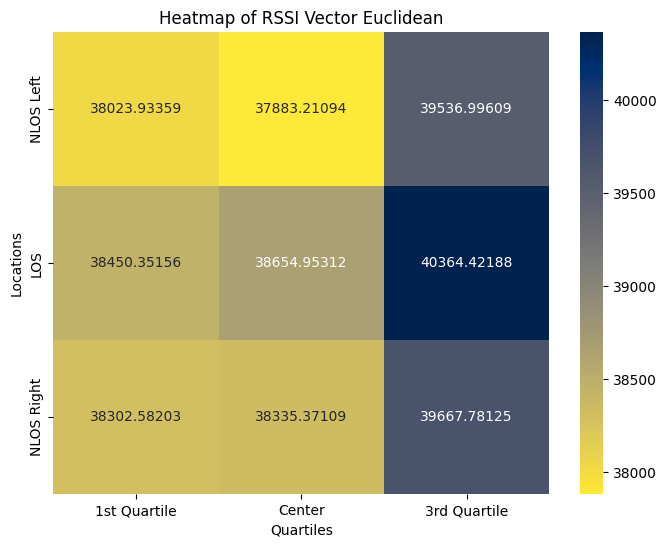

In [ ]:
plot_HeatMapVector_RSSI14(RSSI_LOSCenter4_Cleaned)

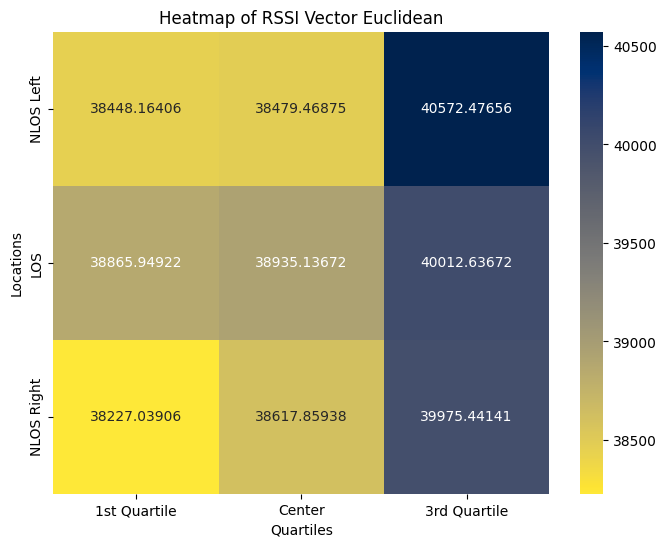

In [ ]:
plot_HeatMapVector_RSSI14(RSSI_LOSFirstQuartile4_Cleaned)

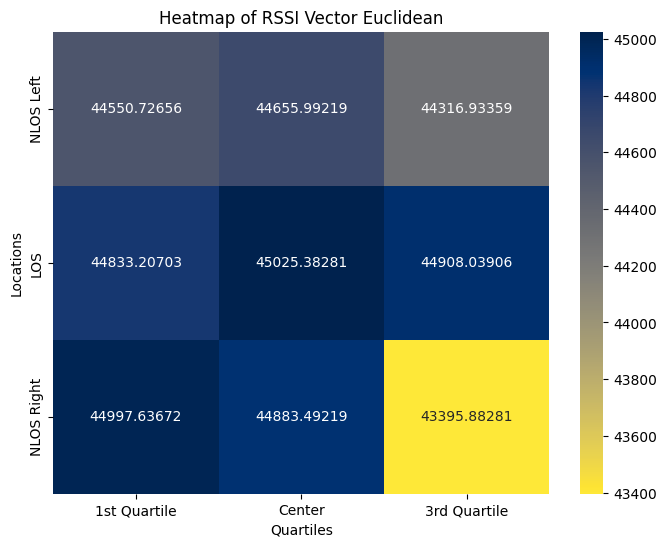

In [ ]:
plot_HeatMapVector_RSSI14(RSSI_LOSThirdQuartile4_Cleaned)

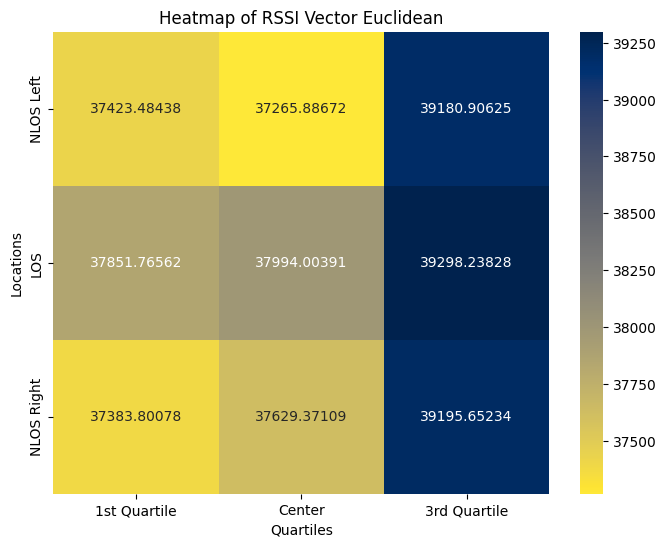

In [ ]:
plot_HeatMapVector_RSSI14(RSSI_NLOSLeftCenter4_Cleaned)

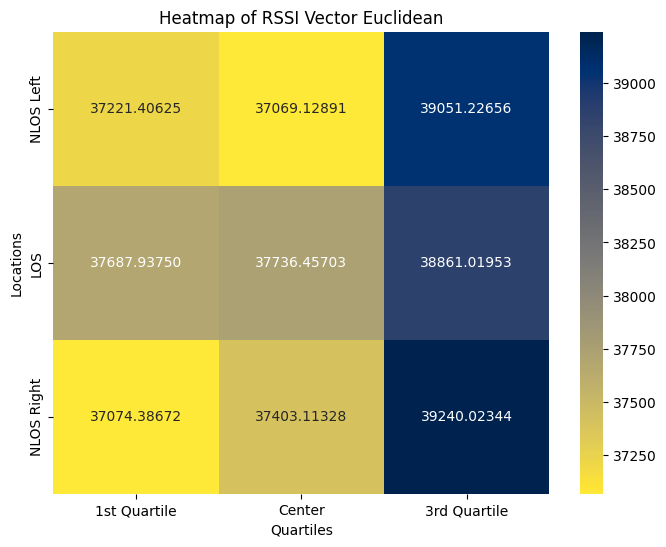

In [ ]:
plot_HeatMapVector_RSSI14(RSSI_NLOSLeftFirstQuartile4_Cleaned)

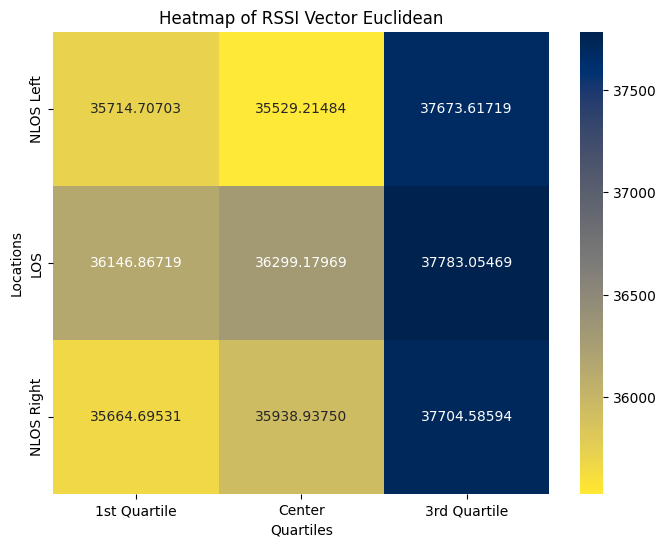

In [ ]:
plot_HeatMapVector_RSSI14(RSSI_NLOSLeftThirdQuartile4_Cleaned)

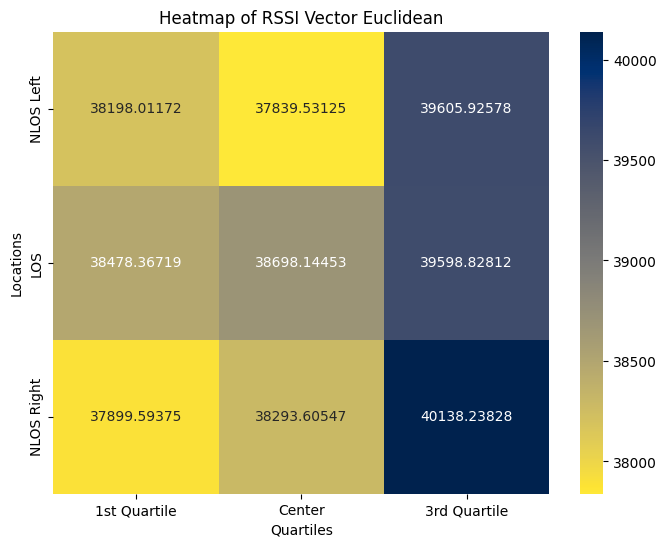

In [ ]:
plot_HeatMapVector_RSSI14(RSSI_NLOSRightCenter4_Cleaned)

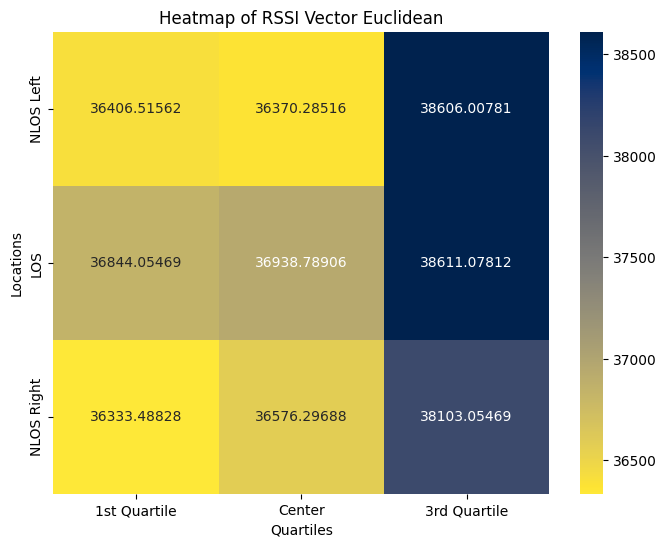

In [ ]:
plot_HeatMapVector_RSSI14(RSSI_NLOSRightFirstQuartile4_Cleaned)

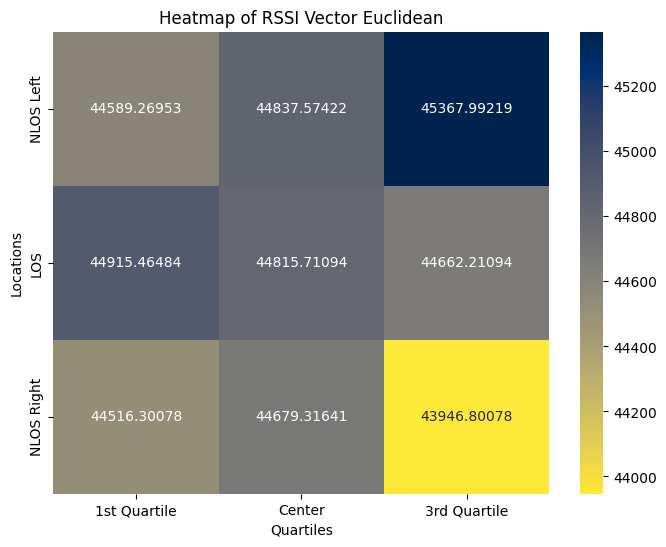

In [ ]:
plot_HeatMapVector_RSSI14(RSSI_NLOSRightThirdQuartile4_Cleaned)